### Summary of the Video: **RAG Fusion: Improving Retrieval-Augmented Generation**

---

### **What is RAG Fusion?**
RAG Fusion is an **experimental approach** to enhance **Retrieval-Augmented Generation (RAG)**. While there isn't an academic paper on it yet, it was introduced in a **blog post by Adrien Rder School**. The core idea is to improve RAG pipelines by bridging the gap between what users explicitly ask and what they *intend to ask*.

This technique addresses challenges where:
- User queries are vague or lack specific details.
- Users expect a comprehensive response on multiple aspects of a topic.

---

### **Key Steps in RAG Fusion**

1. **Query Duplication and Rewriting:**
   - **How it works:**  
     A single user query is rewritten into **multiple sub-queries**, each approaching the topic from different angles.  
     Example:
     - Query: *"Universal Studios Singapore"*
     - Rewritten queries:
       1. What are the rides at Universal Studios Singapore?
       2. How much does it cost to visit Universal Studios Singapore?
       3. What are the best attractions there?
       4. What is the best time of year to visit?

   - These rewritten queries are then sent individually to a **vector database** for retrieval.

2. **Vector Search and Retrieval:**
   - Each rewritten query fetches **different sets of results** from the vector database.  
   - This increases the likelihood of retrieving relevant information from various perspectives.

3. **Ranking Using Reciprocal Rank Fusion:**
   - **How it works:**  
     Results from the multiple queries are **reranked** using the **Reciprocal Rank Fusion algorithm**, which prioritizes the most relevant results from all the queries.
   - This ensures the final set of retrieved results is comprehensive and diverse.

4. **Generating the Final Answer:**
   - The reranked results are treated as **context** for the **LLM (Large Language Model)**.  
   - The original user query and these results are combined in the LLM's prompt to generate the final answer.

---

### **Advantages of RAG Fusion**
1. **Handling Broad or Vague Queries:**
   - Users often ask general questions (e.g., *"Tell me about Universal Studios Singapore"*), expecting detailed responses.  
   - RAG Fusion rewrites the query to extract more specific and diverse information.

2. **Multi-Perspective Retrieval:**
   - By generating sub-queries, it retrieves information from different perspectives (e.g., pricing, activities, timing).

3. **Improved Ranking:**
   - The reranking process filters out irrelevant results and ensures the most useful information is included.

4. **Versatility:**
   - Prompts and query rewriting can be customized based on the use case (e.g., focusing on economic, public health, or social aspects).

---

### **Implementation Overview (Using LangChain and Google PaLM 2)**

1. **Setting Up the Environment:**
   - Use **Google PaLM 2 model** (available for free with an API key from Google’s MakerSuite).
   - Articles and data are preprocessed and stored in **ChromaDB**, a vector database.
   - **BGE embeddings** are used for vector representation.

2. **Rewriting Queries:**
   - A LangChain **prompt template** generates multiple sub-queries from the original query.
   - Example Prompt:  
     > “Generate four search queries related to the input question.”

3. **Retrieving Results:**
   - Each sub-query retrieves relevant information from the vector database.

4. **Ranking Results:**
   - A **ranking function** (e.g., Reciprocal Rank Fusion) combines the results from all sub-queries.

5. **Generating Final Answer:**
   - Combine the ranked results with the user query and pass it into the LLM for the final response.

---

### **Code Highlights**

- **ChromaDB Setup:**
  - Documents are chunked and embedded using **BGE embeddings**.
  - Precomputed embeddings are loaded into the vector database for faster processing.

- **Retriever Setup:**
  - A retriever is created to fetch relevant results from the database.
  - Options like **Maximal Marginal Relevance (MMR)** can be added for better diversity.

- **Query Generation Chain:**
  - A chain generates sub-queries from the original query using the PaLM 2 model and LangChain templates.

- **Ranking Function:**
  - Results from the sub-queries are reranked based on their relevance using Reciprocal Rank Fusion.

- **Final RAG Fusion Chain:**
  - Combines the query generation, retrieval, and ranking into a single pipeline.
  - Outputs the final answer by passing the context and original query into the LLM.

---

### **Example Walkthrough**

- **Input Query:**  
  *"Universal Studios Singapore"*

- **Generated Sub-Queries:**
  1. What are the rides at Universal Studios Singapore?
  2. How much does it cost to visit?
  3. What are the best attractions?
  4. When is the best time to visit?

- **Retrieved Results:**  
  - Information related to rides, ticket pricing, top attractions, and visiting times.

- **Ranked Results:**  
  - The most relevant results are selected and passed as context to the LLM.

- **Final Output:**  
  - A detailed, well-rounded response covering all aspects of Universal Studios Singapore.

---

### **Applications of RAG Fusion**
1. **Tourism and Travel:**
   - Provide detailed information about destinations, attractions, pricing, and more.

2. **Customer Support:**
   - Answer vague or broad customer queries by breaking them into specific sub-queries.

3. **Research and Academics:**
   - Retrieve multi-perspective data on complex topics.

4. **E-commerce:**
   - Generate responses addressing product details, pricing, availability, and reviews.

---

### **Key Takeaways**
- RAG Fusion enhances traditional RAG by rewriting user queries and ranking results effectively.
- It’s especially useful for handling vague or broad queries.
- Tools like LangChain and Google PaLM 2 make implementing this pipeline straightforward.
- The modular approach allows customization at every stage (query generation, ranking, retrieval, etc.).

Let me know if you’d like me to dive deeper into the **code**, **rank fusion algorithm**, or any other aspect of this! 😊

बिल्कुल, चलिए इसे हिंदी में समझाते हैं!

---

**RAG फ्यूजन क्या है और यह कैसे काम करता है?**

RAG (Retrieval-Augmented Generation) फ्यूजन एक टेक्नीक है जिसे उपयोगकर्ता की क्वेरी (सवाल) को बेहतर तरीके से समझने और अधिक उपयोगी उत्तर देने के लिए डिज़ाइन किया गया है। इसे "Adrien Rieder" नामक व्यक्ति ने विकसित किया है, और यह ब्लॉग पोस्ट के माध्यम से पेश किया गया है।

इसका मुख्य उद्देश्य यह है कि यूज़र जो सवाल पूछता है (एक्सप्लिसिट क्वेरी) और जो असल में जानना चाहता है (इंटेंडेड क्वेरी) के बीच का अंतर खत्म करना। अक्सर लोग बहुत सामान्य सवाल पूछते हैं, और इस टेक्नीक का लक्ष्य है सवाल को बेहतर तरीके से डीकोड करके व्यापक और अधिक सटीक डेटा प्रदान करना।

---

### **कैसे काम करता है RAG फ्यूजन?**

1. **Query Duplication (सवाल को अलग-अलग हिस्सों में तोड़ना):**
   - यूज़र की ओर से एक क्वेरी आती है।
   - यह टेक्नीक उस क्वेरी को *अलग-अलग एंगल* से समझने के लिए कई छोटे-छोटे सवालों में तोड़ देती है।
   - उदाहरण: अगर यूज़र पूछता है "Universal Studios Singapore के बारे में बताओ," तो यह क्वेरी तोड़कर अलग-अलग सवाल बनाएगी:
     - Universal Studios Singapore की राइड्स कौन-कौन सी हैं?
     - Universal Studios Singapore में टिकट की कीमत कितनी है?
     - वहां जाने का सबसे अच्छा समय कौन-सा है?

2. **Vector Search Lookup (डेटाबेस से जानकारी निकालना):**
   - हर छोटे सवाल के लिए डेटाबेस (जैसे ChromaDB) में सर्च किया जाता है और संबंधित जानकारी निकाली जाती है।
   - हर सवाल से एक अलग रिजल्ट आता है।

3. **Ranking और Filtering (बेहतर रिजल्ट्स का चयन):**
   - अलग-अलग सवालों से जो रिजल्ट्स आए हैं, उन्हें *reciprocal rank fusion algorithm* से स्कोर किया जाता है।
   - यह स्कोरिंग यह तय करती है कि कौन सा डेटा सबसे ज्यादा उपयोगी है।

4. **Final Context Generation (फाइनल उत्तर तैयार करना):**
   - सभी फ़िल्टर किए गए रिजल्ट्स को मिलाकर, और ओरिजिनल क्वेरी के साथ जोड़कर, एक फाइनल जवाब तैयार किया जाता है।
   - यह फाइनल जवाब जेनरेटिव एलएलएम (जैसे Google PaLM 2 मॉडल) द्वारा तैयार किया जाता है।

---

### **कहां उपयोगी है यह टेक्नीक?**
यह टेक्नीक उन मामलों में बेहद उपयोगी है जहां:
- यूज़र का सवाल अस्पष्ट (vague) हो।
- यूज़र एक विषय के कई पहलुओं को कवर करना चाहता हो।
- उदाहरण के लिए, अगर किसी ने सिर्फ "थीम पार्क" या "सिंगापुर के आकर्षण" जैसे सवाल किए हैं, तो यह टेक्नीक अलग-अलग एंगल्स से सवाल को तोड़कर बेहतर उत्तर प्रदान करेगी।

---

### **LangChain और PaLM 2 का उपयोग:**

#### **1. डेटा तैयार करना:**
- डेवलपर ने Universal Studios Singapore से जुड़े आर्टिकल्स को स्क्रैप करके ChromaDB में सेव किया।
- ChromaDB में डॉक्युमेंट्स को छोटे-छोटे चंक्स में बांटा गया ताकि उन्हें आसानी से सर्च किया जा सके।
- BGE embeddings का उपयोग किया गया ताकि टेक्स्ट को इम्बेडिंग फॉर्मेट में कन्वर्ट किया जा सके।

#### **2. Query Chain बनाना:**
- LangChain के जरिए यूज़र की ओरिजिनल क्वेरी को "मल्टीपल सब-क्वेरीज" में बदला गया।
- PaLM 2 मॉडल का उपयोग करके ये सब-क्वेरीज जनरेट की गईं।
- उदाहरण:
  - "Universal Studios Singapore में कौन-कौन सी राइड्स हैं?"
  - "वहां जाने का सबसे अच्छा समय क्या है?"

#### **3. Context Retrieval और Ranking:**
- हर सब-क्वेरी को ChromaDB से पास करके संबंधित जानकारी निकाली गई।
- निकाले गए डेटा को *reciprocal rank fusion* के जरिए रैंक किया गया ताकि सबसे प्रासंगिक डेटा को प्राथमिकता मिले।

#### **4. फाइनल जेनरेशन:**
- फाइनल कंटेक्स्ट और यूज़र की ओरिजिनल क्वेरी को मिलाकर जवाब तैयार किया गया।

---

### **निष्कर्ष:**
RAG फ्यूजन RAG मॉडल में एक महत्वपूर्ण सुधार है। यह अस्पष्ट सवालों का बेहतर तरीके से जवाब देने के लिए क्वेरी री-राइटिंग और रिजल्ट्स रैंकिंग का उपयोग करता है।

LangChain और Google PaLM 2 मॉडल जैसी तकनीकों के साथ, इसे आसानी से लागू किया जा सकता है। यह मॉडल विशेष रूप से तब उपयोगी है जब यूज़र व्यापक या अस्पष्ट सवाल पूछते हैं और उन्हें अधिक डिटेल्ड जवाब चाहिए।

**अगर कुछ और समझना हो, तो ज़रूर बताएं! 😊**

# RAG Fusion

In [1]:
!pip -q install langchain huggingface_hub openai tiktoken pypdf
!pip -q install google-generativeai chromadb unstructured
!pip -q install sentence_transformers
!pip -q install -U FlagEmbedding

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

### Download the Data & Utils

In [2]:
import os
import requests
import zipfile
from io import BytesIO
import textwrap

def download_and_extract_zip(url, target_folder):
    # Ensure the target folder exists
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Download the file from the URL
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to download file: {url}")

    # Unzip the file in memory
    with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
        zip_ref.extractall(target_folder)

    print(f"Files extracted to {target_folder}")


def zip_folder(folder_path, zip_file_path):
    # Create a ZipFile object in write mode
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                # Create a path relative to the folder to avoid storing absolute paths
                relative_path = os.path.relpath(os.path.join(root, file), os.path.dirname(folder_path))
                # Add file to the zip file
                zipf.write(os.path.join(root, file), arcname=relative_path)

    print(f"{zip_file_path} created successfully.")



def wrap_text(text, width=90): #preserve_newlines
    # Split the input text into lines based on newline characters
    lines = text.split('\n')

    # Wrap each line individually
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]

    # Join the wrapped lines back together using newline characters
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

# URL of the zip file
url = "https://www.dropbox.com/scl/fi/av3nw07o5mo29cjokyp41/singapore_text_files_languages.zip?rlkey=xqdy5f1modtbnrzzga9024jyw&dl=1" # Ensure dl=1 for direct download

# Folder to save extracted files
folder = "singapore_text"

# Call the function
download_and_extract_zip(url, folder)


Files extracted to singapore_text


In [3]:
## download the chroma DB
url = 'https://www.dropbox.com/scl/fi/3kep8mo77h642kvpum2p7/singapore_chroma_db.zip?rlkey=4ry4rtmeqdcixjzxobtmaajzo&dl=1'
download_and_extract_zip(url, '.')

Files extracted to .


In [4]:
import os

from google.colab import userdata
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [5]:
!pip show langchain

Name: langchain
Version: 0.3.12
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


## Google

## Imports

In [6]:
!pip -q install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 33.9 MB/s eta 0:00:00


In [7]:
from langchain.llms import GooglePalm
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores.chroma import Chroma
import langchain

Using Google Palm-2 this time

## Load in Docs

In [8]:
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import TextLoader

In [9]:
%%time
loader = DirectoryLoader('/content/singapore_text/Textfiles3/English/', glob="*.txt", show_progress=True)
docs = loader.load()

100%|██████████| 646/646 [00:40<00:00, 16.04it/s]

CPU times: user 33.7 s, sys: 626 ms, total: 34.3 s
Wall time: 40.3 s


In [10]:
len(docs)
# docs = docs[:10]
len(docs)

646

In [11]:
docs[0]

Document(metadata={'source': '/content/singapore_text/Textfiles3/English/Healthy_Restaurants_in_Eastern_Singapore.txt'}, page_content='Link: https://www.visitsingapore.com/editorials/healthy\n\nrestaurants\n\nin\n\nthe\n\neast/\n\nTitle: Healthy Restaurants in Eastern Singapore\n\nWith beautiful beaches, green spaces and a whole host of opportunities to outdoor activities, Singapore’s east side is a great spot for visitors looking to get active.\n\nIt’s also home to a range of restaurants that serve up wholesome eats and nutritious treats. Locally-inspired fare, grain bowls packed with goodness and hearty soups are all on the menu—check out our guide to fuelling up with healthy eats in eastern Singapore.\n\nFor hearty spring rolls, soups and stews\n\nSouperstar Opened by sisters Hong Wei Ting and Hong Wei Ling, this family-run establishment recreates the humble local snack, popiah. Souperstar replaces the traditional ingredients of shrimp sambal (chilli paste), turnips and boiled eggs 

In [12]:
raw_text = ''
for i, doc in enumerate(docs):
    text = doc.page_content
    if text:
        raw_text += text

In [13]:
raw_text

Output hidden; open in https://colab.research.google.com to view.

In [14]:
len(raw_text)

2123566

In [15]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap  = 100,
    length_function = len,
    is_separator_regex = False,
)

In [16]:
texts = text_splitter.split_text(raw_text)

In [17]:
len(texts)

6219

In [18]:
texts[1]

'It’s also home to a range of restaurants that serve up wholesome eats and nutritious treats. Locally-inspired fare, grain bowls packed with goodness and hearty soups are all on the menu—check out our guide to fuelling up with healthy eats in eastern Singapore.\n\nFor hearty spring rolls, soups and stews'

## BGE Embeddings

In [19]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en-v1.5"
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

embedding_function = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs={'device': 'cuda'},
    encode_kwargs=encode_kwargs
)

<ipython-input-19-9a33d4eeca71>:6: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = HuggingFaceBgeEmbeddings(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Vector DB

In [20]:
%%time
### Make the chroma and persiste to disk
# db = Chroma.from_texts(texts,
#                        embedding_function,
#                        persist_directory="./chroma_db")



### load from disk
db = Chroma(persist_directory="./chroma_db", embedding_function = embedding_function)




<timed exec>:9: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.


CPU times: user 719 ms, sys: 94.2 ms, total: 813 ms
Wall time: 1.54 s


In [21]:
### Save to zip
# zip_folder('/content/chroma_db', 'chroma_db.zip')

In [22]:
query = "Tell me about Universal Studios Singapore?"

db.similarity_search(query, k=5)

[Document(metadata={}, page_content='Universal Studios Singapore'),
 Document(metadata={}, page_content='Universal Studios Singapore is a popular theme park that offers thrilling rides and entertainment for all ages. You can buy Universal Studios Singapore tickets and enjoy an unbeatable discount of 40% from MySingaporePass. The pass provides a hassle-free booking process, allowing you to skip the long queues and gain easy access to the park. Enjoy exhilarating roller coasters, live shows, and immersive themed zones inspired by your favorite movies. The discounted entry with My Singapore Pass'),
 Document(metadata={}, page_content='leisure/fun\n\nthings\n\nto\n\ndo/universal\n\nstudios\n\nsingapore/\n\nTitle: Universal Studios Singapore\n\nThe shimmering wonders of the silver screen comes to vivid life at Universal Studios Singapore, the first-ever Hollywood movie theme park in Southeast Asia.'),
 Document(metadata={}, page_content='The magic of Hollywood comes to life at Universal Stu

# Setup a retriever

In [23]:
retriever = db.as_retriever(k=5) # can add mmr fetch_k=20, search_type="mmr"

retriever.get_relevant_documents(query)[1]

<ipython-input-23-8901a4f3a55a>:3: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retriever.get_relevant_documents(query)[1]


Document(metadata={}, page_content='Universal Studios Singapore is a popular theme park that offers thrilling rides and entertainment for all ages. You can buy Universal Studios Singapore tickets and enjoy an unbeatable discount of 40% from MySingaporePass. The pass provides a hassle-free booking process, allowing you to skip the long queues and gain easy access to the park. Enjoy exhilarating roller coasters, live shows, and immersive themed zones inspired by your favorite movies. The discounted entry with My Singapore Pass')

In [ ]:
! pip install langchain_google_genai

In [35]:
# from langchain.chat_models import ChatGooglePalm : depricated the google palm. no longer existing
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model = "gemini-1.5-pro")

result = model.invoke("Tell me about Universal Studio Singapore")
print(result)

content="Universal Studios Singapore is a theme park located within Resorts World Sentosa on Sentosa Island, Singapore. It's the first and only Universal Studios theme park in Southeast Asia.  It officially opened on March 18, 2010.\n\nHere's a breakdown of what you can expect:\n\n**Key Features:**\n\n* **Seven Themed Zones:**  The park is divided into seven distinct zones, each with its own attractions, dining, and shopping experiences:\n    * **Hollywood:** Classic Hollywood glamour with character meet-and-greets.\n    * **New York:**  Experience the city's energy with shows and attractions based on popular films.\n    * **Sci-Fi City:** Futuristic thrills with Battlestar Galactica dueling roller coasters and TRANSFORMERS The Ride: The Ultimate 3D Battle.\n    * **Ancient Egypt:** Journey back in time with the Revenge of the Mummy indoor roller coaster.\n    * **The Lost World:** Dinosaur adventures with Jurassic Park Rapids Adventure and other attractions.\n    * **Far Far Away:**  

## Chat chain

In [36]:
from operator import itemgetter

# from langchain.chat_models import ChatGooglePalm
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableLambda, RunnablePassthrough

In [38]:

template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

model = ChatGoogleGenerativeAI(model = "gemini-1.5-pro")

In [39]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [40]:
text_reply = chain.invoke("Tell me about Universal Studio Singapore")

print(wrap_text(text_reply))

Universal Studios Singapore is a popular theme park with thrilling rides and entertainment
for all ages. It's the first Hollywood movie theme park in Southeast Asia, bringing the
silver screen to life.  You can buy tickets with a 40% discount from MySingaporePass,
which also offers a hassle-free booking process and lets you skip long queues.  The park
features exhilarating roller coasters, live shows, and immersive themed zones inspired by
movies.



## With RagFusion

![Sam Witteveen - Advanced RAG 06 - RAG Fusion [GchC5WxeXGc - 793x446 - 8m17s].png](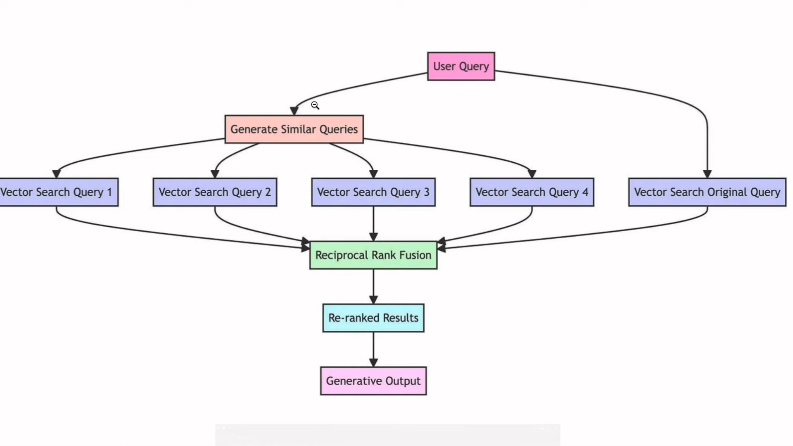)

In [41]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema.output_parser import StrOutputParser
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate
from langchain.prompts import ChatMessagePromptTemplate, PromptTemplate

In [42]:
prompt = ChatPromptTemplate(input_variables=['original_query'],
     messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='You are a helpful assistant that generates multiple search queries based on a single input query.')),
     HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['original_query'], template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'))]
                            )

In [43]:
prompt

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant that generates multiple search queries based on a single input query.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'), additional_kwargs={})])

In [44]:
# prompt = ChatPromptTemplate.from_messages([
#     ("system", "You are a helpful assistant that generates multiple search queries based on a single input query."),
#     ("user", "Generate multiple search queries related to: {question}/n OUTPUT (4 queries):"),
# ])

prompt

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant that generates multiple search queries based on a single input query.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'), additional_kwargs={})])

In [45]:
generate_queries = (
    prompt | model | StrOutputParser() | (lambda x: x.split("\n"))
)

In [46]:
generate_queries

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant that generates multiple search queries based on a single input query.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='Generate multiple search queries related to: {question} \n OUTPUT (4 queries):'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7e0b5aa7df90>, default_metadata=())
| StrOutputParser()
| RunnableLambda(lambda x: x.split('\n'))

In [47]:
original_query = "universal studios Singapore"

In [48]:
from langchain.load import dumps, loads


def reciprocal_rank_fusion(results: list[list], k=60):
    fused_scores = {}
    for docs in results:
        # Assumes the docs are returned in sorted order of relevance
        for rank, doc in enumerate(docs):
            doc_str = dumps(doc)
            if doc_str not in fused_scores:
                fused_scores[doc_str] = 0
            previous_score = fused_scores[doc_str]
            fused_scores[doc_str] += 1 / (rank + k)

    reranked_results = [
        (loads(doc), score)
        for doc, score in sorted(fused_scores.items(), key=lambda x: x[1], reverse=True)
    ]
    return reranked_results

In [49]:
ragfusion_chain = generate_queries | retriever.map() | reciprocal_rank_fusion

In [50]:
langchain.debug = True

In [51]:
ragfusion_chain.input_schema.schema()

{'properties': {'question': {'title': 'Question', 'type': 'string'}},
 'required': ['question'],
 'title': 'PromptInput',
 'type': 'object'}

In [52]:
ragfusion_chain.invoke({"question": original_query})

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "question": "universal studios Singapore"
}
[chain/start] [chain:RunnableSequence > prompt:ChatPromptTemplate] Entering Prompt run with input:
{
  "question": "universal studios Singapore"
}
[chain/end] [chain:RunnableSequence > prompt:ChatPromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > llm:ChatGoogleGenerativeAI] Entering LLM run with input:
{
  "prompts": [
    "System: You are a helpful assistant that generates multiple search queries based on a single input query.\nHuman: Generate multiple search queries related to: universal studios Singapore \n OUTPUT (4 queries):"
  ]
}
[llm/end] [chain:RunnableSequence > llm:ChatGoogleGenerativeAI] [1.49s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "1. Universal Studios Singapore ticket price and packages\n2. Universal Studios Singapore opening hours and best time to visit\n3. Universa

<ipython-input-48-9511316c723a>:16: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  (loads(doc), score)


[(Document(metadata={}, page_content='Universal Studios Singapore'),
  0.06532656778558418),
 (Document(metadata={}, page_content='Universal Studios Singapore is a popular theme park that offers thrilling rides and entertainment for all ages. You can buy Universal Studios Singapore tickets and enjoy an unbeatable discount of 40% from MySingaporePass. The pass provides a hassle-free booking process, allowing you to skip the long queues and gain easy access to the park. Enjoy exhilarating roller coasters, live shows, and immersive themed zones inspired by your favorite movies. The discounted entry with My Singapore Pass'),
  0.03306010928961749),
 (Document(metadata={}, page_content='Here are some of the top attractions that can be booked with the My Singapore Pass:\n\nUniversal Studios Singapore @ 40% Off'),
  0.03200204813108039),
 (Document(metadata={}, page_content='Must-visit attractions such as the Universal Studios Singapore are probably already on your itinerary, but be sure not 

# making the final chain

In [53]:
from langchain.schema.runnable import RunnablePassthrough
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

full_rag_fusion_chain = (
    {
        "context": ragfusion_chain,
        "question": RunnablePassthrough()
    }
    | prompt
    | model
    | StrOutputParser()
)

In [54]:
full_rag_fusion_chain.input_schema.schema()

{'properties': {'question': {'title': 'Question', 'type': 'string'},
  'root': {'title': 'Root'}},
 'required': ['question', 'root'],
 'title': 'RunnableParallel<context,question>Input',
 'type': 'object'}

In [55]:
full_rag_fusion_chain.invoke({"question": "Tell me about Universal Studio Singapore?"})

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "question": "Tell me about Universal Studio Singapore?"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<context,question>] Entering Chain run with input:
{
  "question": "Tell me about Universal Studio Singapore?"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<context,question> > chain:RunnableSequence] Entering Chain run with input:
{
  "question": "Tell me about Universal Studio Singapore?"
}
[chain/start] [chain:RunnableSequence > chain:RunnableParallel<context,question> > chain:RunnableSequence > prompt:ChatPromptTemplate] Entering Prompt run with input:
{
  "question": "Tell me about Universal Studio Singapore?"
}
[chain/end] [chain:RunnableSequence > chain:RunnableParallel<context,question> > chain:RunnableSequence > prompt:ChatPromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > chain:RunnableParallel<context,question> > chain

'Universal Studios Singapore is a popular theme park with thrilling rides and entertainment for all ages. It offers a 40% discount through MySingaporePass, which also allows for hassle-free booking and easy access.  The park features exhilarating roller coasters, live shows, and immersive themed zones inspired by movies. It is Southeast Asia’s first and only Universal Studios theme park, featuring 24 rides and attractions across seven themed zones based on blockbuster movies and TV characters.  It brings the magic of Hollywood to life with adrenaline-pumping rides, immersive live entertainment, and attractions based on favorite movie characters, including six distinct zones from science-fiction worlds to the Jurassic era and ancient Egypt.  One recommended area is Far Far Away, modeled after the world from the Shrek movie series.\n'